In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
killingDF = pd.read_csv("PoliceKillingsUS.csv",encoding='gbk')

In [2]:
killingDF.dtypes
killingDF.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
5,11,Kenneth Joe Brown,04/01/15,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,05/01/15,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
7,15,Brock Nichols,06/01/15,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False
8,16,Autumn Steele,06/01/15,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
9,17,Leslie Sapp III,06/01/15,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False


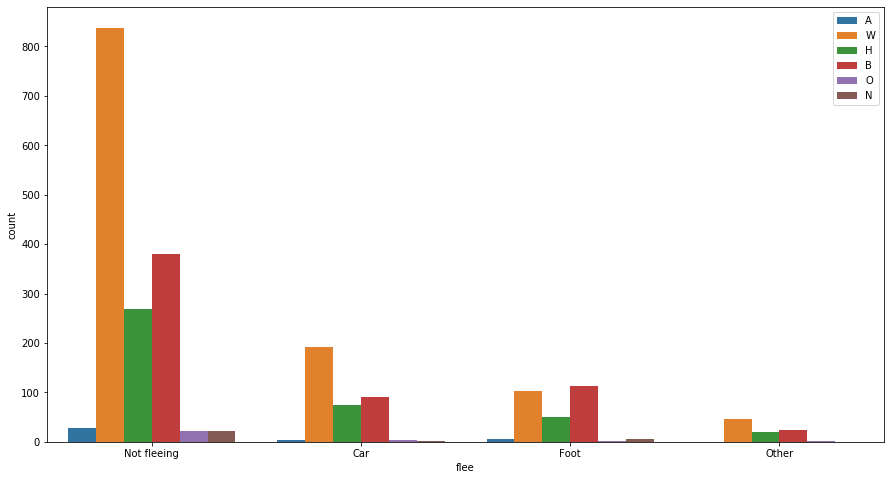

In [3]:
plt.figure(figsize=(15,8))
sns.countplot(x='flee', hue='race', data=killingDF)
plt.legend(loc='upper right')
plt.show()

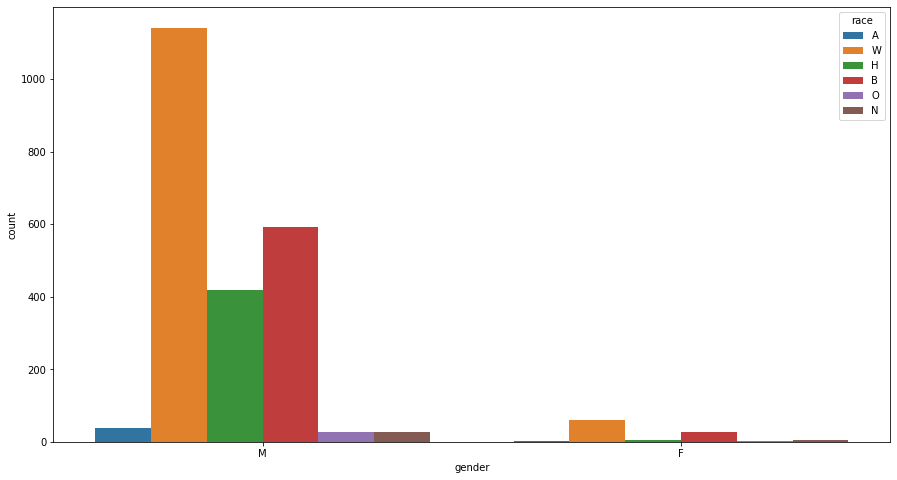

In [4]:
plt.figure(figsize=(15,8))
sns.countplot(x='gender', hue='race', data=killingDF)

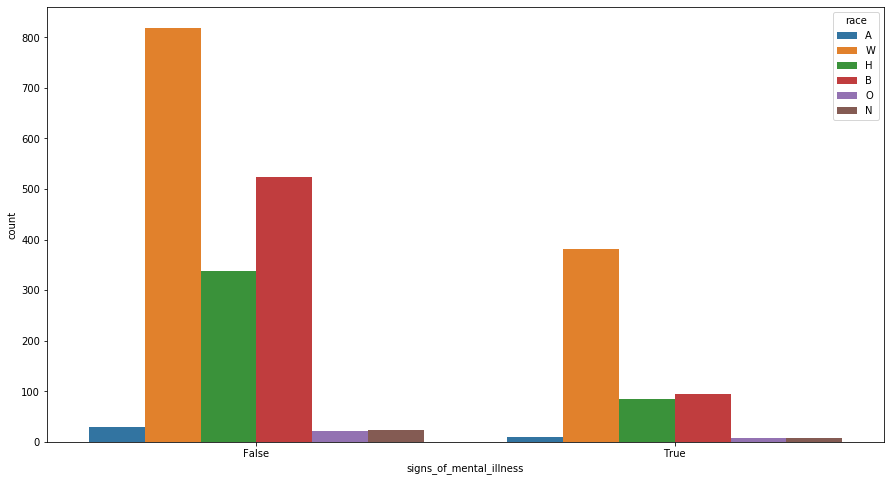

In [5]:
plt.figure(figsize=(15,8))
sns.countplot(x='signs_of_mental_illness', hue='race', data=killingDF)

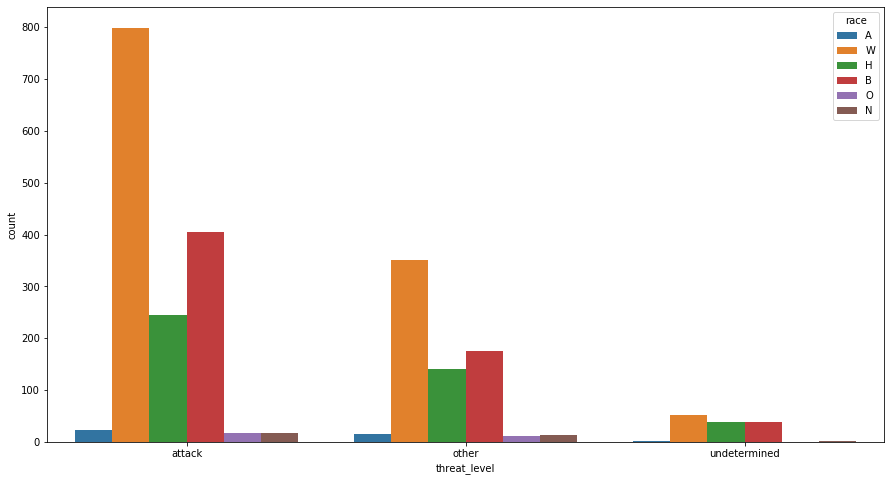

In [6]:
plt.figure(figsize=(15,8))
sns.countplot(x='threat_level', hue='race', data=killingDF)

(0, 720)

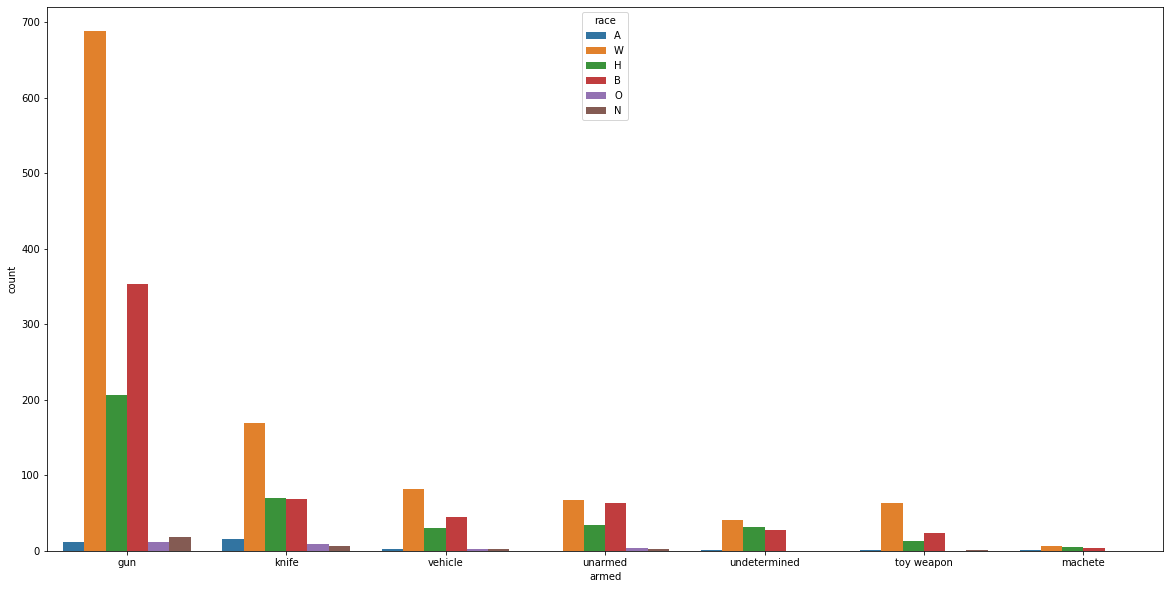

In [46]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='armed', hue='race', data=killingDF,order = killingDF['armed'].value_counts().index)
ax.set_xlim(-0.5,6.5)
ax.set_ylim(0,720)

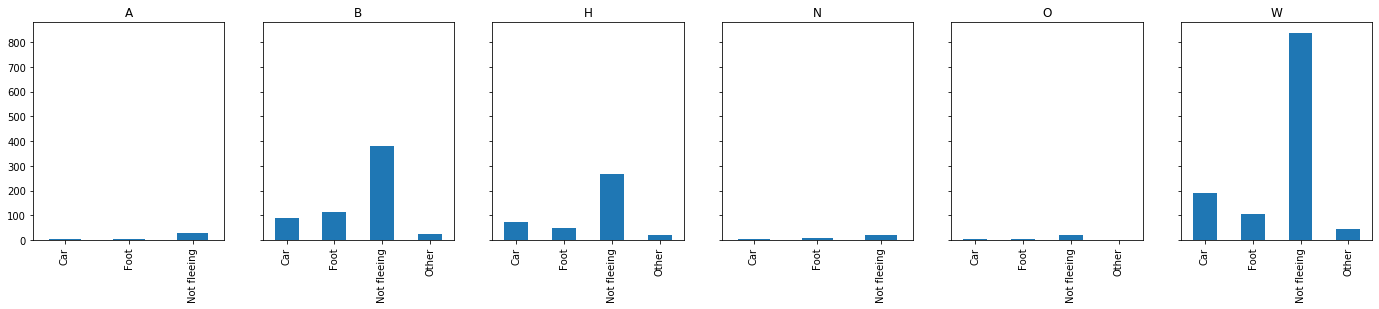

In [20]:
import seaborn as sns
import pandas as pd
import numpy as np
#correlation between race and flee
races = np.sort(killingDF['race'].dropna().unique())
fig, axes = plt.subplots(1, len(races), figsize=(24, 4), sharey=True)
for ax, race in zip(axes, races):
    killingDF[killingDF['race']==race]['flee'].value_counts().sort_index().plot(kind='bar', ax=ax, title=race)

Text(0.5, 1, 'Age distribution by race')

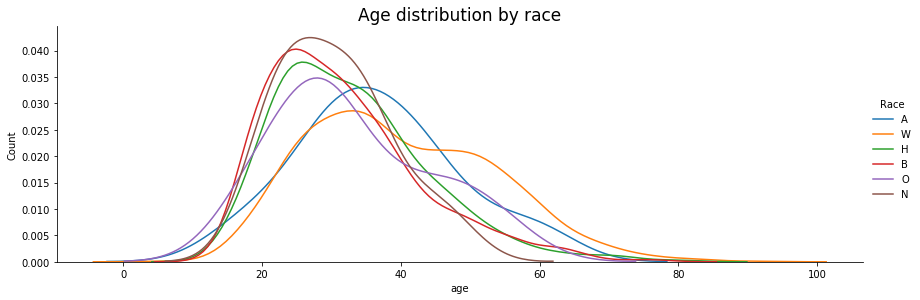

In [26]:
g = sns.FacetGrid(data=killingDF, hue="race",aspect=3, size=4)
g.map(sns.kdeplot, "age")
g.add_legend(title="Race")
g.set_ylabels("Count")
plt.title("Age distribution by race", fontsize=17)

Text(0.5, 1, 'Age distribution by race')

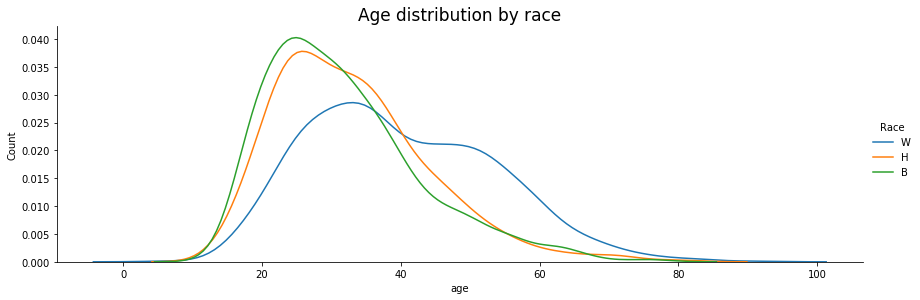

In [28]:
races = killingDF.loc[(killingDF["race"] == "B") | (killingDF["race"] == "W") | (killingDF["race"] == "H")]
g = sns.FacetGrid(data=races, hue="race",aspect=3, size=4)
g.map(sns.kdeplot, "age")
g.add_legend(title="Race")
g.set_ylabels("Count")
plt.title("Age distribution by race", fontsize=17)

Text(0.5, 1, 'People were killed in every state')

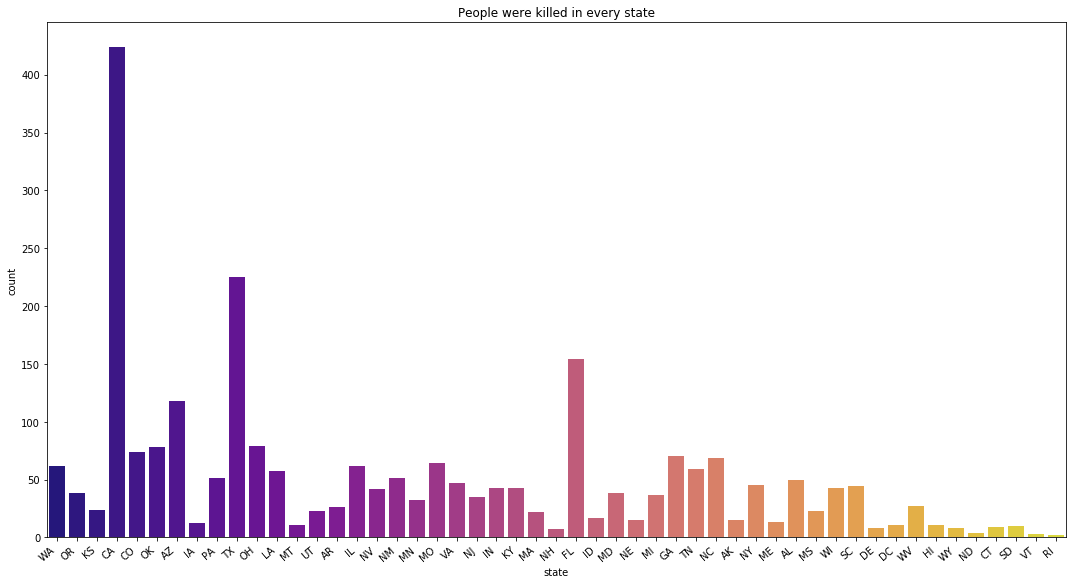

In [39]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='state', data=killingDF,palette='plasma')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('People were killed in every state')

Text(0.5, 1.0, 'TOP 20 cities of killings in US')

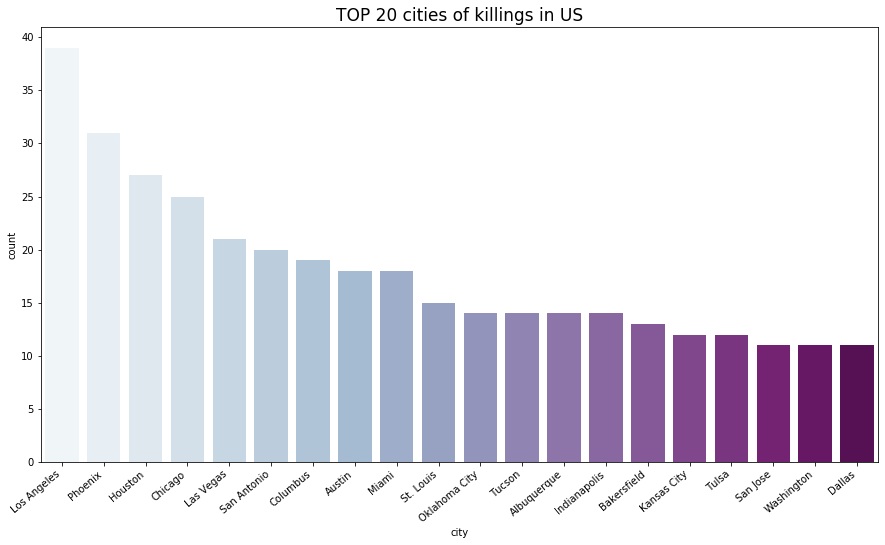

In [41]:
city = killingDF['city'].value_counts(ascending=False)
citydf = killingDF.filter(['city'], axis=1)
citydf["count"] = 1
group_city = citydf.groupby('city', as_index=False,sort=False).sum()
group_city.sort_index(ascending=False)
group_city = group_city.sort_values('count', ascending=False).head(20)                                                       
plt.figure(figsize=(15,8))
ax = sns.barplot(data=group_city, x='city', y='count',palette='BuPu')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('TOP 20 cities of killings in US', fontsize=17)

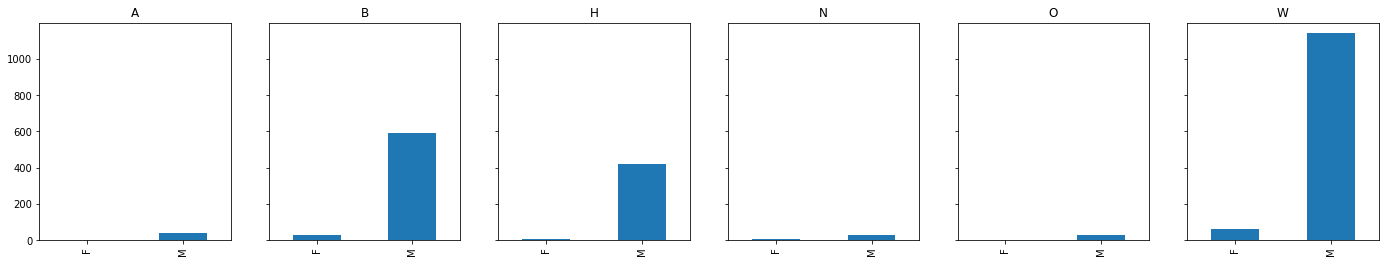

In [21]:
races = np.sort(killingDF['race'].dropna().unique())
fig, axes = plt.subplots(1, len(races), figsize=(24, 4), sharey=True)
for ax, race in zip(axes, races):
    killingDF[killingDF['race']==race]['gender'].value_counts().sort_index().plot(kind='bar', ax=ax, title=race)

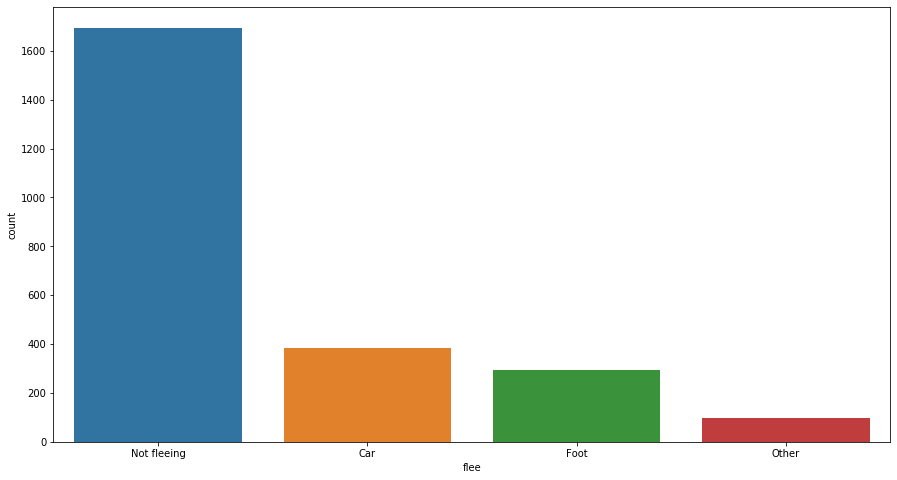

In [30]:
plt.figure(figsize=(15,8))
sns.countplot(x='flee', data=killingDF)